# India ODI Matches Analysis
The data used in this analysis is taken from [Kaggle](https://www.kaggle.com/jaykay12/odi-cricket-matches-19712017), the correctness of data is not guaranteed, this is just some fun analysis for education purpose.

In [133]:
#importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [134]:
#reading the data
df = pd.read_csv("./ContinousDataset.csv")
print(df.shape)
df.head()

(7494, 13)


,Unnamed: 0,Scorecard,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,0,ODI # 1,Australia,England,Winner2ndInning,Melbourne,"Jan 5, 1971",Australia,Australia,Home,Away,Second,First
1,1,ODI # 2,England,Australia,Winner2ndInning,Manchester,"Aug 24, 1972",England,England,Home,Away,Second,First
2,2,ODI # 3,England,Australia,Winner2ndInning,Lord's,"Aug 26, 1972",Australia,England,Home,Away,First,Second
3,3,ODI # 4,England,Australia,Winner2ndInning,Birmingham,"Aug 28, 1972",England,England,Home,Away,Second,First
4,4,ODI # 5,New Zealand,Pakistan,Winner1stInning,Christchurch,"Feb 11, 1973",New Zealand,New Zealand,Home,Away,First,Second


In [135]:
#checking for Null Values
df.isnull().sum()

Unnamed: 0         0
Scorecard          0
Team 1             0
Team 2             0
Margin             0
Ground             0
Match Date         0
Winner             0
Host_Country     130
Venue_Team1        0
Venue_Team2        0
Innings_Team1      0
Innings_Team2      0
dtype: int64

In [138]:
#dropping useless columns
df.drop(["Scorecard", "Unnamed: 0"], axis=1, inplace=True)
#taking samples of India matches only
df = df[(df["Team 1"]=="India") | (df["Team 2"]=="India")]

In [139]:
#resetting the index
df.reset_index(drop=True, inplace=True)
df.head()

,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2
0,England,India,Winner2ndInning,Leeds,"Jul 13, 1974",England,England,Home,Away,Second,First
1,England,India,Winner2ndInning,The Oval,"Jul 15-16, 1974",England,England,Home,Away,Second,First
2,England,India,Winner1stInning,Lord's,"Jun 7, 1975",England,England,Home,Away,First,Second
3,East Africa,India,Winner2ndInning,Leeds,"Jun 11, 1975",India,England,Neutral,Neutral,First,Second
4,India,New Zealand,Winner2ndInning,Manchester,"Jun 14, 1975",New Zealand,England,Neutral,Neutral,First,Second


# India win/lose% home and away

In [144]:
#calculating India win/lose percent
win = (df.Winner=="India").mean()*100
lose = 100-win
print(f"Win: {win}\nLose: {lose}")

Win: 53.97727272727273
Lose: 46.02272727272727


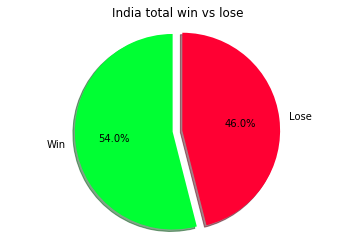

In [145]:
plt.pie(x = [win, lose],
        labels=["Win", "Lose"],
        colors=[(0,1,0.2,1), (1,0,0.2,1)],
        explode=[0,0.1],
        shadow=True,
        startangle=90,
        autopct='%1.1f%%'
       )
plt.axis('equal')
plt.title("India total win vs lose")
plt.show()

In [148]:
#win/lose at home
win_at_home = (df[df["Host_Country"]=="India"].Winner=="India").mean()*100
lose_at_home = 100-win_at_home
print(f"Win at Home:{win_at_home}%\nLose at home:{lose_at_home}%")

Win at Home:60.67796610169491%
Lose at home:39.32203389830509%


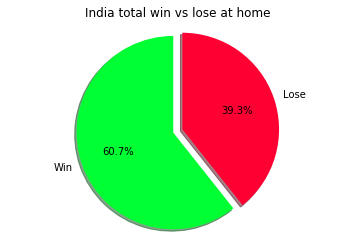

In [149]:
plt.pie(x = [win_at_home, lose_at_home],
        labels=["Win", "Lose"],
        colors=[(0,1,0.2,1), (1,0,0.2,1)],
        explode=[0,0.1],
        shadow=True,
        startangle=90,
        autopct='%1.1f%%'
       )
plt.axis('equal')
plt.title("India total win vs lose at home")
plt.show()

In [151]:
win_away = (df[df["Host_Country"]!="India"].Winner=="India").mean()*100
lose_away = 100-win_away
print(f"Away Win:{win_away}%\nAway Lose:{lose_away}%")

Away Win:50.598290598290596%
Away Lose:49.401709401709404%


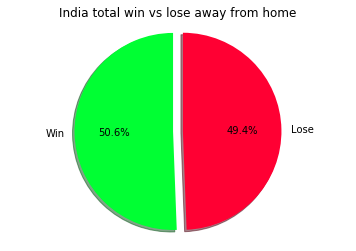

In [152]:
plt.pie(x = [win_away, lose_away],
        labels=["Win", "Lose"],
        colors=[(0,1,0.2,1), (1,0,0.2,1)],
        explode=[0,0.1],
        shadow=True,
        startangle=90,
        autopct='%1.1f%%'
       )
plt.axis('equal')
plt.title("India total win vs lose away from home")
plt.show()

# Inference:
* Overall India win more matches than it loses.
* The performance of India is better at home.
* India wins one of its two matches in away conditions.

# Matches against various countries

In [154]:
#adding a column for opposite team
opp = []
for i in df.itertuples():
    if i._1=="India":
        opp.append(i._2)
    else:
        opp.append(i._1)
df['opp'] = opp

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


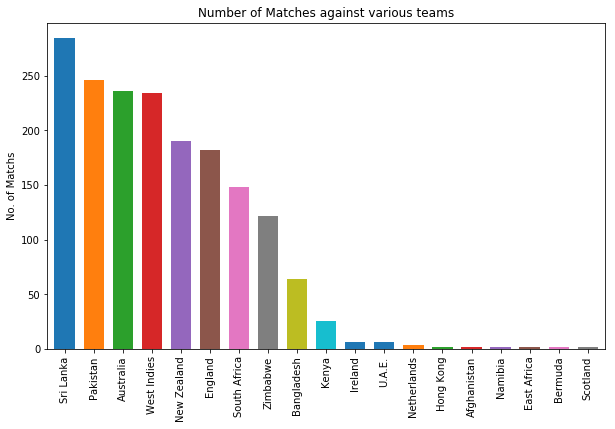

In [266]:
#number of matches
df.opp.value_counts().plot(kind="bar",title="Number of Matches against various teams", figsize=(10,6), width=0.7)
plt.ylabel("No. of Matchs")
plt.show()

In [158]:
#Getting countries with at-least 10 matches
temp = df.opp.value_counts()
countries = np.array(temp[temp>10].index)
#making a new bool column for India win
df["India_win"] = [True if i.Winner=="India" else False for i in df.itertuples()]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


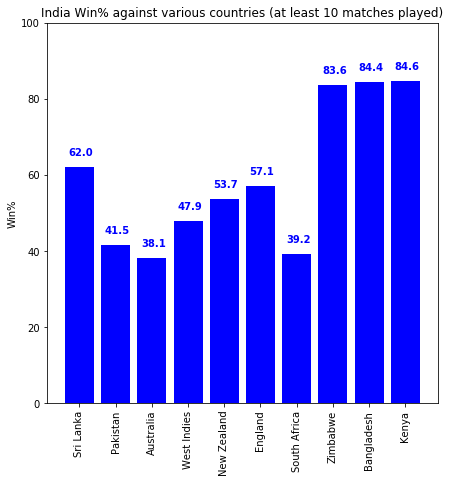

In [159]:
win_percent = df.groupby('opp').India_win.mean()*100
win_percent = round(win_percent,1)
fig, ax = plt.subplots(figsize=(7,7))
ax.bar(countries, win_percent[countries], color="blue", width=0.8)
for i, v in enumerate(win_percent[countries]):
    ax.text(i-0.3, v + 3, str(v), color='blue', fontweight='bold')
plt.title("India Win% against various countries (at least 10 matches played)")
plt.ylabel("Win%")
plt.ylim(0,100)
plt.xticks(rotation="vertical")
plt.show()

# Inference
* India has played most matches with its neighbour countries (Sri Lanka and Pakistan)
* India has the lowest win % against Australia

# Cricket Grounds

In [164]:
df.head()

,Team 1,Team 2,Margin,Ground,Match Date,Winner,Host_Country,Venue_Team1,Venue_Team2,Innings_Team1,Innings_Team2,opp,India_win
0,England,India,Winner2ndInning,Leeds,"Jul 13, 1974",England,England,Home,Away,Second,First,England,False
1,England,India,Winner2ndInning,The Oval,"Jul 15-16, 1974",England,England,Home,Away,Second,First,England,False
2,England,India,Winner1stInning,Lord's,"Jun 7, 1975",England,England,Home,Away,First,Second,England,False
3,East Africa,India,Winner2ndInning,Leeds,"Jun 11, 1975",India,England,Neutral,Neutral,First,Second,East Africa,True
4,India,New Zealand,Winner2ndInning,Manchester,"Jun 14, 1975",New Zealand,England,Neutral,Neutral,First,Second,New Zealand,False


In [243]:
top_home_grounds = df[df.Host_Country=='India'].Ground.value_counts()[:10].index
home_ground_win = (df[df.Host_Country=='India'].groupby("Ground").India_win.mean()*100)[top_home_grounds]
home_ground_win = round(home_ground_win,2)
home_ground_lose = round(100-home_ground_win,2)

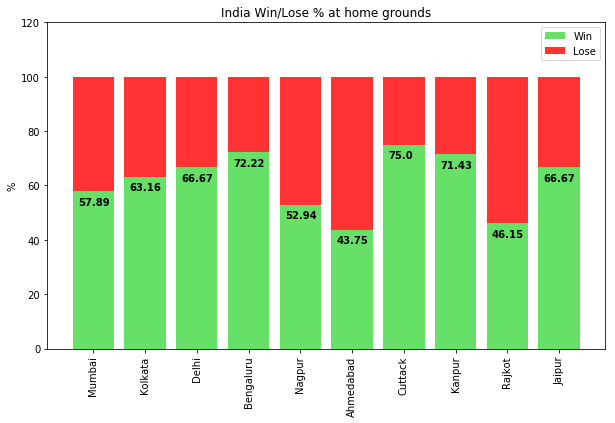

In [256]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(home_ground_win.index, home_ground_win.values, color=(0,0.8,0,0.6), width=0.8, label="Win")
ax.bar(home_ground_lose.index, home_ground_lose.values, color=(1,0,0,0.8), width=0.8, bottom=home_ground_win.values, label="Lose")
for i, v in enumerate(home_ground_win.values):
    ax.text(i-0.3, v-5, str(v), color="black", fontweight='bold')
plt.title("India Win/Lose % at home grounds")
plt.ylabel("%")
plt.legend()
plt.ylim(0,120)
plt.xticks(rotation="vertical")
plt.show()

In [257]:
top_away_grounds = df[df.Host_Country!='India'].Ground.value_counts()[:10].index
away_ground_win = (df[df.Host_Country!='India'].groupby("Ground").India_win.mean()*100)[top_away_grounds]
away_ground_win = round(away_ground_win,2)
away_ground_lose = round(100-away_ground_win,2)

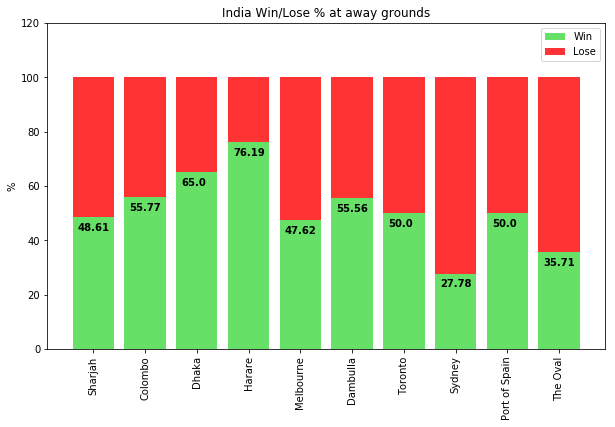

In [258]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(away_ground_win.index, away_ground_win.values, color=(0,0.8,0,0.6), width=0.8, label="Win")
ax.bar(away_ground_lose.index, away_ground_lose.values, color=(1,0,0,0.8), width=0.8, bottom=away_ground_win.values, label="Lose")
for i, v in enumerate(away_ground_win.values):
    ax.text(i-0.3, v-5, str(v), color="black", fontweight='bold')
plt.title("India Win/Lose % at away grounds")
plt.ylabel("%")
plt.legend()
plt.ylim(0,120)
plt.xticks(rotation="vertical")
plt.show()

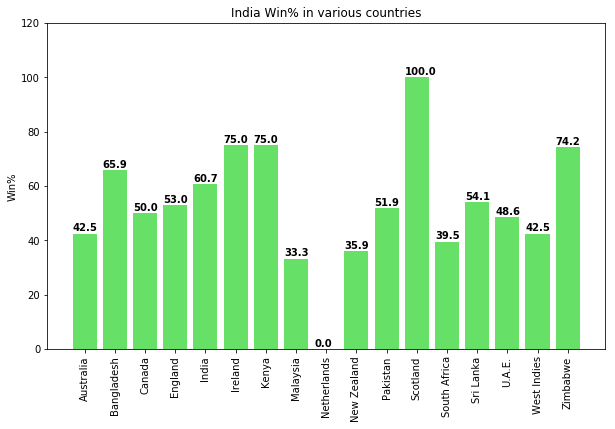

In [273]:
country_win = df.groupby("Host_Country").India_win.mean()*100
country_win = round(country_win,1)
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(country_win.index, country_win.values, color=(0,0.8,0,0.6), width=0.8)
for i, v in enumerate(country_win.values):
    ax.text(i-0.4, v+1, str(v), color='black', fontweight='bold')
plt.title("India Win% in various countries")
plt.ylabel("Win%")
plt.ylim(0,120)
plt.xticks(rotation="vertical")
plt.show()

# Inference
* At home, India has the best win % at Bengaluru and Cuttack Stadiums
* Outside home, India has best track record in Harare and Dhaka
* India perform very poorly when playing in South Africa and New Zealand